# History of the Scala Language
<p>
Import Data:
</p>
<p>
    <code>pulls_2011-2013.csv</code> Basic information of pull requests between 2011 and 2013
</p><p> 
    <code>pulls_2014-2018.csv</code> Basic information of pull requests between 2014 and 2018
</p><p>
    <code>pull_files.csv</code> Information about modified files
</p>

In [1]:
import pandas as pd

pulls_one=pd.read_csv('pulls_2011-2013.csv')
pulls_two=pd.read_csv('pulls_2014-2018.csv')
pull_files=pd.read_csv('pull_files.csv')

display(pulls_one.info())
display(pulls_two.info())
display(pull_files.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     3296 non-null   int64 
 1   user    3296 non-null   object
 2   date    3296 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     2904 non-null   int64 
 1   user    2904 non-null   object
 2   date    2904 non-null   object
dtypes: int64(1), object(2)
memory usage: 68.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85588 entries, 0 to 85587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     85588 non-null  int64 
 1   file    85588 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


None

## Prep and Clean

In [2]:
#unify pulls
pulls=pulls_two.append(pulls_one)

#convert date column to datetype
pulls['date']=pd.to_datetime(pulls['date'],utc=True)

## Merging

In [3]:
data=pulls.merge(pull_files,on='pid')

## Recent activity

<AxesSubplot:xlabel='month,year'>

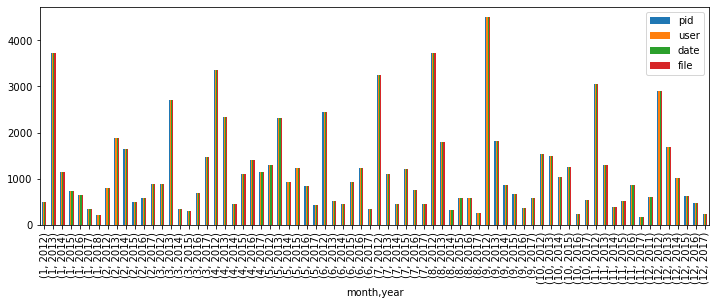

In [4]:
%matplotlib inline

#make month column
data['month']=data['date'].dt.month

#make year column
data['year']=data['date'].dt.year

#group by month and year, count pull requests
counts=data.groupby(['month','year']).count()

#plot
counts.plot(kind='bar',figsize=(12,4))

## Group effort or lone wolf?

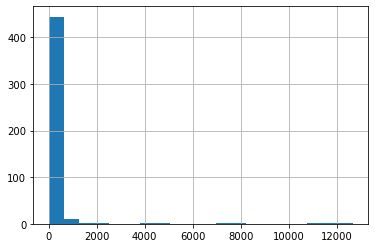

In [5]:
%matplotlib inline

by_user=data.groupby('user')['pid'].count()


ax=by_user.hist(bins=20)

## Recent changes

In [6]:
last_10=pulls.nlargest(10,'date')

joined_pr=last_10.merge(pull_files,on='pid')

files=set(joined_pr['file'])

files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## Top Contributors of given file

In [7]:
file='src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr=data[data['file']==file]

author_counts=file_pr.groupby('user')['pid'].count()

author_counts.nlargest(3)

user
xeno-by     11
retronym     5
soc          4
Name: pid, dtype: int64

## Most recent Contributors to given file

In [8]:
joined_pr=file_pr.merge(pulls, on=['pid','date','user'])

users_last_10=set(joined_pr.nlargest(10,'date')['user'])

users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## xeno-by vs. soc

<AxesSubplot:xlabel='date'>

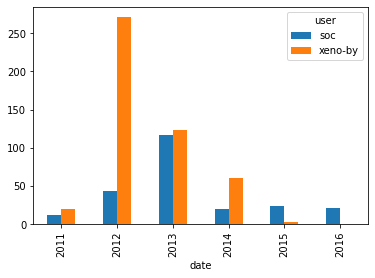

In [9]:
%matplotlib inline

authors=['xeno-by','soc']

by_author=pulls[pulls['user'].isin(authors)]

counts = by_author.groupby(['user',by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
counts_wide.plot(kind='bar')

<AxesSubplot:xlabel='date'>

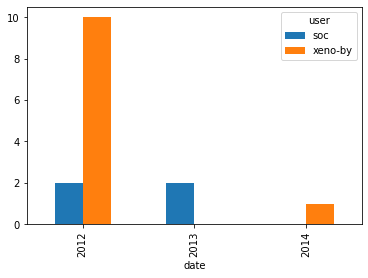

In [10]:
by_author = data[data['user'].isin(authors)]

by_file = by_author[by_author['file']==file]

grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

by_file_wide = grouped.pivot_table(index='date',columns='user',values='pid',fill_value=0)

by_file_wide.plot(kind='bar')